### Importing Modules 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,RocCurveDisplay,auc,roc_curve

plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

sns.set_style("whitegrid" )
sns.set_theme(style="ticks")



C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Dataset Inspecting 

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_train = df_train.drop(['PassengerId','Name','Cabin'],axis=1)

In [6]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
for i in df_train.columns:
    print(f"Unique values in the {i} column = ", df_train[i].unique())
    print("----------------------------------------------------------------------------")

Unique values in the HomePlanet column =  ['Europa' 'Earth' 'Mars' nan]
----------------------------------------------------------------------------
Unique values in the CryoSleep column =  [False True nan]
----------------------------------------------------------------------------
Unique values in the Destination column =  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
----------------------------------------------------------------------------
Unique values in the Age column =  [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
----------------------------------------------------------------------------
Unique values in the VIP column =  [False True nan]
----------------------------------------------------

In [8]:
df_train[df_train['HomePlanet'].isna()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
59,NaN,True,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,True
113,NaN,False,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,False
186,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,True
225,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,False
234,NaN,True,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,False
8613,NaN,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,False
8666,NaN,False,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,True
8674,NaN,False,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,False


In [9]:
df_train = df_train.dropna()

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6923 non-null   object 
 1   CryoSleep     6923 non-null   object 
 2   Destination   6923 non-null   object 
 3   Age           6923 non-null   float64
 4   VIP           6923 non-null   object 
 5   RoomService   6923 non-null   float64
 6   FoodCourt     6923 non-null   float64
 7   ShoppingMall  6923 non-null   float64
 8   Spa           6923 non-null   float64
 9   VRDeck        6923 non-null   float64
 10  Transported   6923 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 601.7+ KB


In [11]:
df_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.069826,0.136128,0.031926,0.124103,0.103387,-0.079018
RoomService,0.069826,1.000000,-0.011897,0.050573,0.006052,-0.020190,-0.242456
FoodCourt,0.136128,-0.011897,1.000000,-0.012681,0.226292,0.224612,0.051395
ShoppingMall,0.031926,0.050573,-0.012681,1.000000,0.016790,-0.002093,0.012922
Spa,0.124103,0.006052,0.226292,0.016790,1.000000,0.146838,-0.220362
VRDeck,0.103387,-0.020190,0.224612,-0.002093,0.146838,1.000000,-0.207137
Transported,-0.079018,-0.242456,0.051395,0.012922,-0.220362,-0.207137,1.000000


<AxesSubplot:>

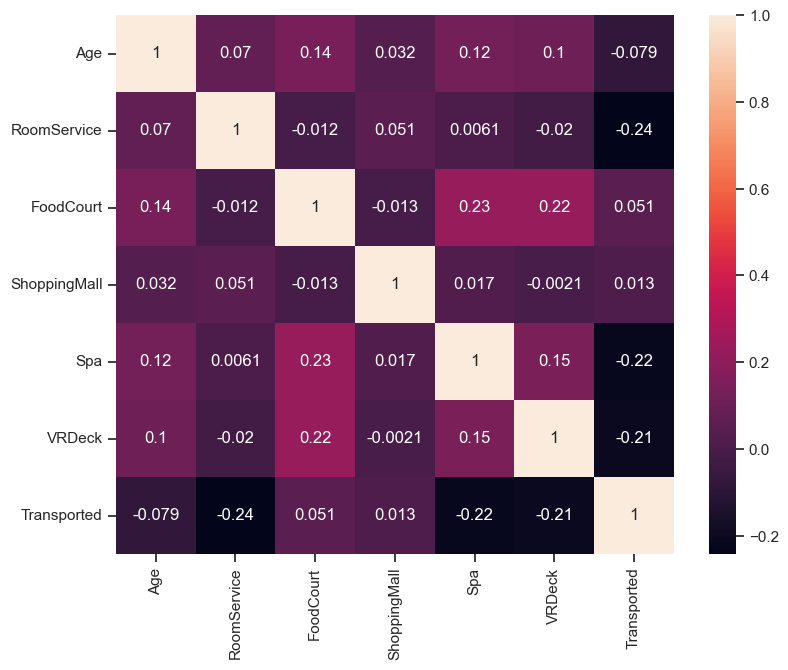

In [12]:
sns.heatmap(df_train.corr(),annot=True)

In [13]:
for i in df_test.columns:
    print(f"Unique values in the {i} column = ", df_test[i].unique())
    print("----------------------------------------------------------------------------")

Unique values in the PassengerId column =  ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
----------------------------------------------------------------------------
Unique values in the HomePlanet column =  ['Earth' 'Europa' 'Mars' nan]
----------------------------------------------------------------------------
Unique values in the CryoSleep column =  [True False nan]
----------------------------------------------------------------------------
Unique values in the Cabin column =  ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
----------------------------------------------------------------------------
Unique values in the Destination column =  ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
----------------------------------------------------------------------------
Unique values in the Age column =  [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33. nan  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.
  3.

In [14]:
df_test = df_test.drop(['PassengerId','Name'],axis=1)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


### EDA

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_file("your_report_project.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Encoding 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lE = LabelEncoder()

In [20]:
df_train['HomePlanet'] = lE.fit_transform(df_train['HomePlanet'])

In [21]:
df_train['Destination'] = lE.fit_transform(df_train['Destination'])

In [22]:
df_train['CryoSleep'] = pd.get_dummies(df_train['CryoSleep'],drop_first=True)

In [23]:
df_train['VIP'] = pd.get_dummies(df_train['VIP'],drop_first=True)

In [24]:
df_train['Transported'] = pd.get_dummies(df_train['Transported'],drop_first=True)

In [25]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6923 non-null   int32  
 1   CryoSleep     6923 non-null   uint8  
 2   Destination   6923 non-null   int32  
 3   Age           6923 non-null   float64
 4   VIP           6923 non-null   uint8  
 5   RoomService   6923 non-null   float64
 6   FoodCourt     6923 non-null   float64
 7   ShoppingMall  6923 non-null   float64
 8   Spa           6923 non-null   float64
 9   VRDeck        6923 non-null   float64
 10  Transported   6923 non-null   uint8  
dtypes: float64(6), int32(2), uint8(3)
memory usage: 453.0 KB


In [27]:
for i in df_train.columns:
    print(f"Unique values in the {i} column = ", df_train[i].unique())
    print("----------------------------------------------------------------------------")

Unique values in the HomePlanet column =  [1 0 2]
----------------------------------------------------------------------------
Unique values in the CryoSleep column =  [0 1]
----------------------------------------------------------------------------
Unique values in the Destination column =  [2 1 0]
----------------------------------------------------------------------------
Unique values in the Age column =  [39. 24. 58. 33. 16. 44. 26. 35. 14. 45. 32. 48. 28. 31.  0.  1. 49. 10.
  7. 21. 15. 34. 43. 47.  2. 23. 20. 17. 55.  4. 56. 25. 38. 27. 36. 22.
 62. 18. 42. 19. 37. 13.  8. 40.  3. 54.  9.  6. 29. 64. 67. 61. 50. 11.
 51. 41. 30. 46. 60. 63. 57.  5. 79. 68. 59. 74. 12. 65. 53. 71. 52. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]
----------------------------------------------------------------------------
Unique values in the VIP column =  [0 1]
----------------------------------------------------------------------------
Unique values in the RoomService column =  [   0.  109.   43. ...

In [28]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [29]:
df_test = df_test.drop(['Cabin'],axis=1)

In [30]:
df_test['HomePlanet'] = lE.fit_transform(df_test['HomePlanet'])

In [31]:
df_test['Destination'] = lE.fit_transform(df_test['Destination'])
df_test['Destination'].value_counts()

2    2956
0     841
1     388
3      92
Name: Destination, dtype: int64

In [32]:
df_test['CryoSleep'] = pd.get_dummies(df_test['CryoSleep'],drop_first=True)

In [33]:
df_test['VIP'] = pd.get_dummies(df_test['VIP'],drop_first=True)

In [34]:
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   uint8  
 2   Destination   4277 non-null   int32  
 3   Age           4186 non-null   float64
 4   VIP           4277 non-null   uint8  
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), int32(2), uint8(2)
memory usage: 242.4 KB


In [36]:
df_test = df_test.dropna()

### Divide The dataset 

In [37]:
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [38]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [39]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6923, dtype: uint8

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling & Evaluation 

#### 1.Logstic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
LRC =LogisticRegression()
LRC.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred_LR=LRC.predict(X_test)
y_pred_LR

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

<AxesSubplot:>

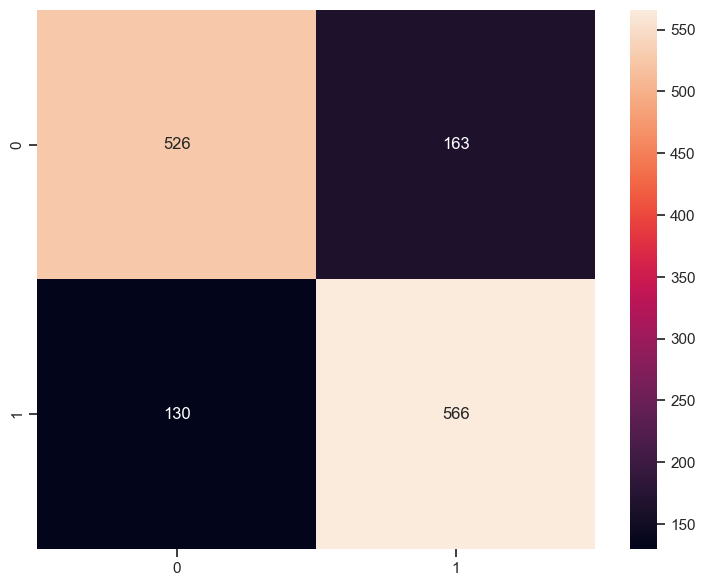

In [45]:
cm_lr = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_lr, annot=True, fmt="d")

In [46]:
acc_lr = accuracy_score(y_test, y_pred_LR)
clr_lr = classification_report(y_test, y_pred_LR)
print('The accuracy is \n',acc_lr)
print('------------------')
print('The Confusion marix \n',cm_lr)
print('------------------')
print(clr_lr)

The accuracy is 
 0.7884476534296029
------------------
The Confusion marix 
 [[526 163]
 [130 566]]
------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       689
           1       0.78      0.81      0.79       696

    accuracy                           0.79      1385
   macro avg       0.79      0.79      0.79      1385
weighted avg       0.79      0.79      0.79      1385



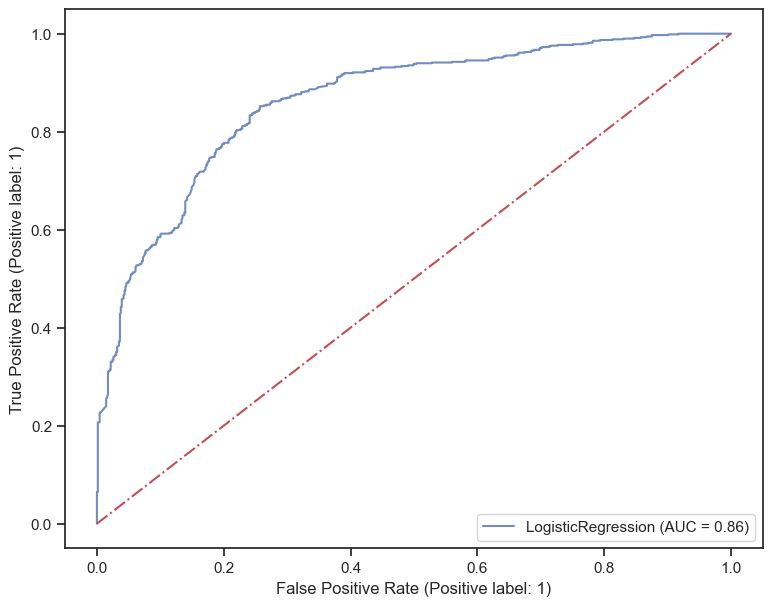

In [47]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(LRC, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### 2.SVM 

In [48]:
from sklearn.svm import SVC 

In [72]:
svc = SVC()

In [73]:
svc.fit(X_train,y_train)

SVC()

In [74]:
y_pred_SV = svc.predict(X_test)
y_pred_SV

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

<AxesSubplot:>

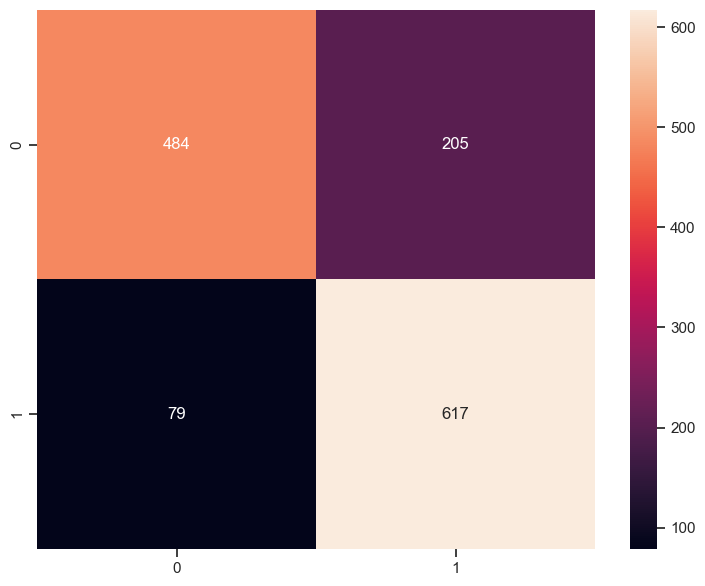

In [75]:
cm_sv = confusion_matrix(y_test, y_pred_SV)
sns.heatmap(cm_sv, annot=True, fmt="d")

In [76]:
acc_sv = accuracy_score(y_test, y_pred_SV)
clr_sv = classification_report(y_test, y_pred_SV)
print('The accuracy is \n',acc_sv)
print('------------------')
print('The Confusion marix \n',cm_sv)
print('------------------')
print(clr_sv)

The accuracy is 
 0.7949458483754512
------------------
The Confusion marix 
 [[484 205]
 [ 79 617]]
------------------
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       689
           1       0.75      0.89      0.81       696

    accuracy                           0.79      1385
   macro avg       0.81      0.79      0.79      1385
weighted avg       0.80      0.79      0.79      1385



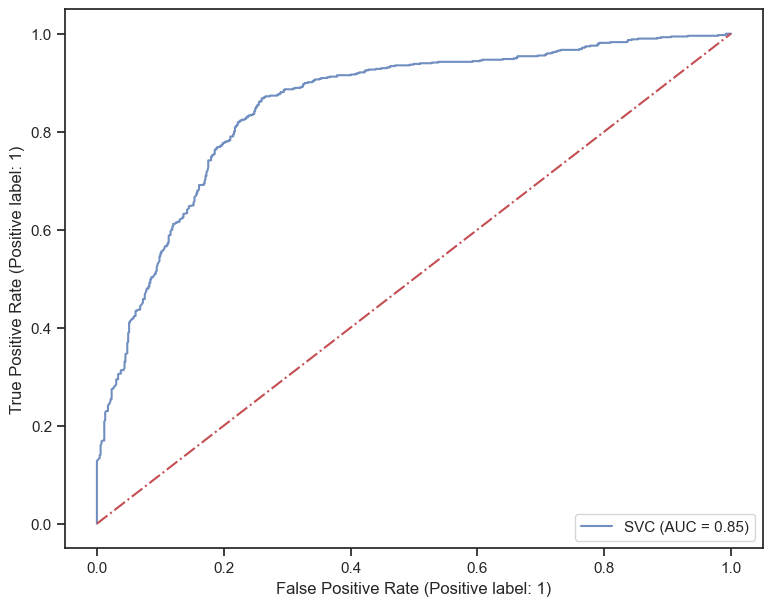

In [77]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='r',  linestyle='-.')

#### Thanks